In [ ]:
'''
 * Copyright (c) 2010 Radhamadhab Dalai
 *
 * Permission is hereby granted, free of charge, to any person obtaining a copy
 * of this software and associated documentation files (the "Software"), to deal
 * in the Software without restriction, including without limitation the rights
 * to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
 * copies of the Software, and to permit persons to whom the Software is
 * furnished to do so, subject to the following conditions:
 *
 * The above copyright notice and this permission notice shall be included in
 * all copies or substantial portions of the Software.
 *
 * THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
 * IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
 * FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
 * AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
 * LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
 * OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
 * THE SOFTWARE.
'''

## Posterior Predictive p-values

In last section, we discussed **Bayes factors** as a form of hypothesis testing within the Bayesian framework. An alternative approach to hypothesis testing in the Bayesian context is via the theory of **posterior predictive p-values** (Meng, 1994). This involves specifying a null hypothesis $ H_0 $ and an alternative hypothesis $ H_1 $, where $ E_0 $ and $ E_1 $ are two events, representing either disjoint events or two different models for the same data.

## Steps to Calculate Posterior Predictive p-values

### (i) Define a Suitable Discrepancy Measure $ T(y, \theta) $
The discrepancy measure (or test statistic), denoted by:

$$ T(y, \theta) $$

is chosen carefully based on both the null hypothesis $ H_0 $ and the alternative hypothesis $ H_1 $.

### (ii) Define $ x $ as an Independent Future Replicate of the Data $ y $
Let $ x $ represent a future observation that is independent of the observed data $ y $, under the Bayesian model.

### (iii) Calculate the Posterior Predictive p-value
The posterior predictive p-value (ppp-value) is defined as:

$$
p = P \left( T(x, \theta) \geq T(y, \theta) \mid y \right)
$$

This probability is computed under the assumption that the null hypothesis $ H_0 $ is true:

$$
p = P \left( T(x, \theta) \geq T(y, \theta) \mid y, H_0 \right)
$$

#### Note 1:
The ppp-value assumes that $ H_0 $ is true, hence the calculation is conditional on $ H_0 $.

#### Note 2:
The discrepancy measure $ T(y, \theta) $ may or may not depend on the model parameter $ \theta $. In some cases, $ T(y, \theta) $ is written as $ T(y) $.

### Intuition Behind Posterior Predictive p-values
The idea behind choosing the discrepancy measure $ T $ is that if the observed data $ y $ is highly inconsistent with the null hypothesis $ H_0 $ in favor of the alternative hypothesis $ H_1 $, then the posterior predictive p-value $ p $ should be small.

The ppp-value framework is more flexible than classical p-values and can be used in cases where classical theory is difficult to apply.

### Comparison with Classical Hypothesis Testing
In classical hypothesis testing, the p-value is the probability of observing a test statistic as extreme as or more extreme than the one observed, assuming that $ H_0 $ is true. The posterior predictive p-value generalizes this idea within the Bayesian framework, allowing for greater flexibility in the choice of test statistics and the modeling of future data.

An example of how ppp-value theory can perform well relative to the classical theory is where the null hypothesis is composite, meaning that it consists of the specification of multiple values rather than a single value (e.g. $H_0 :| θ | < ε$ as compared to$ H_0 : θ = 0$ ). The next exercise illustrates this feature.


## Exercise 8: Posterior Predictive p-values for Testing a Composite Null Hypothesis

Consider the Bayesian model:

$$
(y \mid \lambda) \sim \text{Poisson}(\lambda)
$$

with the prior:

$$
f(\lambda) = e^{-\lambda}, \quad \lambda > 0
$$

We observe $ y = 3 $.

### Part (a) Testing $ H_0: \lambda = 1 $ vs $ H_1: \lambda > 2 $

We define the test statistic as:

$$
T(y, \lambda) = y
$$

Since $ (x \mid y, \lambda) \sim \text{Poi}(\lambda) $, the posterior predictive p-value is given by:

$$
p = P(x \geq y \mid y, \lambda = 1)
$$

This is the probability that a Poisson random variable with mean $ \lambda = 1 $ takes a value greater than or equal to $ y = 3 $. Using the cumulative distribution function $ F_{\text{Poi}(1)}(r) $, we have:

$$
p = 1 - F_{\text{Poi}(1)}(y - 1)
$$

For $ y = 3 $, the ppp-value becomes:

$$
p = 1 - \left( \frac{e^{-1} 1^0}{0!} + \frac{e^{-1} 1^1}{1!} + \frac{e^{-1} 1^2}{2!} \right)
$$

This simplifies to:

$$
p = 1 - \left( e^{-1} \left( 1 + 1 + \frac{1}{2} \right) \right)
$$

Finally, we compute:

$$
p = 1 - \left( e^{-1} \times 2.5 \right)
$$

Since $ e^{-1} \approx 0.36788 $, we get:

$$
p \approx 1 - (0.36788 \times 2.5) = 1 - 0.9197 = 0.0803
$$

Thus, the posterior predictive p-value for testing $ H_0: \lambda = 1 $ is:

$$
p \approx 0.0803
$$

### Part (b) Testing $ H_0: \lambda \in \{1, 2\} $ vs $ H_1: \lambda > 2 $

In this case, we need to find the posterior predictive p-value for the null hypothesis:

$$
H_0: \lambda \in \{1, 2\}
$$

The test statistic remains $ T(y, \lambda) = y $, and we calculate the ppp-value as the weighted sum of the ppp-values for $ \lambda = 1 $ and $ \lambda = 2 $, with weights proportional to their posterior probabilities.

The posterior predictive p-value is:

$$
p = P(x \geq y \mid y, \lambda \in \{1, 2\})
$$

This is computed as:

$$
p = \frac{P(\lambda = 1 \mid y)p(x \geq y \mid y, \lambda = 1) + P(\lambda = 2 \mid y)p(x \geq y \mid y, \lambda = 2)}{P(\lambda = 1 \mid y) + P(\lambda = 2 \mid y)}
$$

Since the posterior distribution for $ \lambda $ is not given explicitly, we assume a uniform prior over $ \lambda \in \{1, 2\} $ and compute the individual ppp-values as follows:

- For $ \lambda = 1 $, $ p \approx 0.0803 $ (from part (a))
- For $ \lambda = 2 $, we use the same approach as in part (a) to get:

$$
p = 1 - \left( \frac{e^{-2} 2^0}{0!} + \frac{e^{-2} 2^1}{1!} + \frac{e^{-2} 2^2}{2!} \right)
$$

This simplifies to:

$$
p = 1 - \left( e^{-2} \left( 1 + 2 + 2 \right) \right)
$$

Finally, we compute:

$$
p = 1 - \left( e^{-2} \times 5 \right)
$$

Since $ e^{-2} \approx 0.13534 $, we get:

$$
p \approx 1 - (0.13534 \times 5) = 1 - 0.6767 = 0.3233
$$

Therefore, the overall ppp-value is approximately:

$$
p \approx \frac{0.5 \times 0.0803 + 0.5 \times 0.3233}{0.5 + 0.5} = \frac{0.04015 + 0.16165}{1} = 0.2018
$$

Thus, the posterior predictive p-value for testing $ H_0: \lambda \in \{1, 2\} $ is:

$$
p \approx 0.2018
$$

### (b): Posterior Predictive p-values for Testing a Composite Null Hypothesis

We are testing the composite null hypothesis $ H_0: \lambda \in \{1, 2\} $ versus $ H_1: \lambda > 2 $. The observed data is $ y = 3 $.

We first note that the posterior distribution for $ \lambda $ given $ y $ under $ H_0 $ is proportional to the product of the prior $ f(\lambda \mid H_0) $ and the likelihood $ f(y \mid H_0, \lambda) $, which gives:

$$
f(\lambda \mid y, H_0) \propto f(\lambda \mid H_0) f(y \mid H_0, \lambda) = e^{-\lambda} \frac{\lambda^y}{y!}, \quad \lambda = 1, 2
$$

Substituting $ y = 3 $, we have:

$$
f(\lambda \mid y, H_0) \propto e^{-\lambda} \lambda^3, \quad \lambda = 1, 2
$$

Thus, for $ \lambda = 1 $ and $ \lambda = 2 $:

$$
f(\lambda = 1 \mid y, H_0) \propto e^{-1} \times 1^3 = e^{-1}
$$

$$
f(\lambda = 2 \mid y, H_0) \propto e^{-2} \times 2^3 = e^{-2} \times 8
$$

Now, we compute the posterior probabilities for $ \lambda = 1 $ and $ \lambda = 2 $:

$$
P(\lambda = 1 \mid y, H_0) = \frac{e^{-1}}{e^{-1} + e^{-2} \times 8}
$$

$$
P(\lambda = 1 \mid y, H_0) = \frac{e^{-1}}{e^{-1} + 8e^{-2}} = \frac{1}{1 + 8e^{-1}} \approx 0.48015
$$

Therefore:

$$
P(\lambda = 2 \mid y, H_0) = 1 - 0.48015 = 0.51985
$$

### Posterior Predictive p-value Calculation

The posterior predictive p-value is:

$$
p = P(x \geq y \mid y, H_0) = E\{P(x \geq y \mid y, H_0, \lambda) \mid y, H_0\}
$$

This can be expressed as:

$$
p = P(\lambda = 1 \mid y, H_0) \times P(x \geq y \mid y, \lambda = 1) + P(\lambda = 2 \mid y, H_0) \times P(x \geq y \mid y, \lambda = 2)
$$

For $ \lambda = 1 $:

$$
P(x \geq y \mid y, \lambda = 1) = 1 - F_{\text{Poi}(1)}(y - 1) = 1 - F_{\text{Poi}(1)}(2)
$$

For \( \lambda = 2 \):

$$
P(x \geq y \mid y, \lambda = 2) = 1 - F_{\text{Poi}(2)}(2)
$$

Substitute the values:

$$
P(x \geq y \mid y, \lambda = 1) = 1 - \left( \frac{e^{-1} 1^0}{0!} + \frac{e^{-1} 1^1}{1!} + \frac{e^{-1} 1^2}{2!} \right)
$$

$$
= 1 - \left( e^{-1} \times (1 + 1 + 0.5) \right) = 1 - (e^{-1} \times 2.5) = 1 - 0.9197 = 0.0803
$$

For $ \lambda = 2 $:

$$
P(x \geq y \mid y, \lambda = 2) = 1 - \left( \frac{e^{-2} 2^0}{0!} + \frac{e^{-2} 2^1}{1!} + \frac{e^{-2} 2^2}{2!} \right)
$$

$$
= 1 - \left( e^{-2} \times (1 + 2 + 2) \right) = 1 - (e^{-2} \times 5) = 1 - 0.6767 = 0.3233
$$

Finally, the ppp-value is:

$$
p = 0.48015 \times 0.0803 + 0.51985 \times 0.3233
$$

$$
p \approx 0.20664
$$

Thus, the posterior predictive p-value for testing $ H_0: \lambda \in \{1, 2\} $ is:

$$
p \approx 0.20664
$$



In [1]:
import numpy as np
from scipy.stats import poisson

# Define function to calculate cumulative distribution function (CDF) for Poisson distribution
def poisson_cdf(lam, y):
    return poisson.cdf(y, lam)

# Define function to calculate posterior predictive p-value
def posterior_predictive_p_value(y_observed, lambda_vals, priors):
    p_value = 0
    for i, lam in enumerate(lambda_vals):
        # Calculate the probability of observing x >= y_observed under each lambda value
        p_x_geq_y = 1 - poisson_cdf(lam, y_observed - 1)
        # Calculate the weighted contribution to the posterior predictive p-value
        p_value += priors[i] * p_x_geq_y
    return p_value

# Given data and prior probabilities
y_observed = 3
lambda_vals = [1, 2]  # lambda = 1 and lambda = 2
priors = [0.48015, 0.51985]  # Posterior probabilities for lambda = 1 and lambda = 2

# Calculate the posterior predictive p-value
ppp_value = posterior_predictive_p_value(y_observed, lambda_vals, priors)

print(f"Posterior predictive p-value: {ppp_value:.5f}")


Posterior predictive p-value: 0.20664


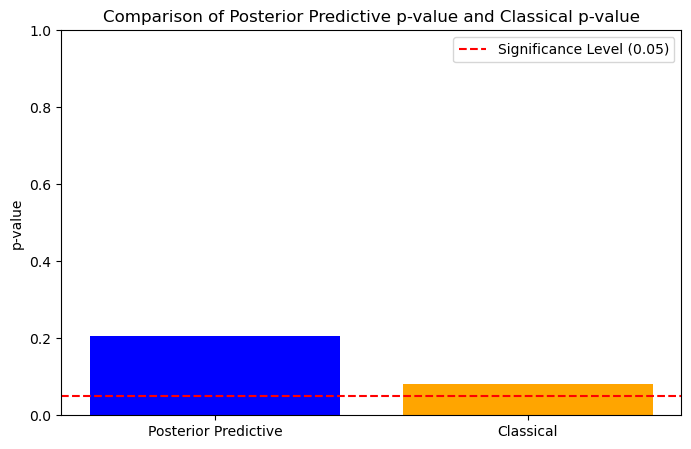

Posterior Predictive p-value: 0.20664
Classical p-value: 0.08030


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson

# Define function to calculate cumulative distribution function (CDF) for Poisson distribution
def poisson_cdf(lam, y):
    return poisson.cdf(y, lam)

# Define function to calculate posterior predictive p-value
def posterior_predictive_p_value(y_observed, lambda_vals, priors):
    p_value = 0
    for i, lam in enumerate(lambda_vals):
        # Calculate the probability of observing x >= y_observed under each lambda value
        p_x_geq_y = 1 - poisson_cdf(lam, y_observed - 1)
        # Calculate the weighted contribution to the posterior predictive p-value
        p_value += priors[i] * p_x_geq_y
    return p_value

# Given data and prior probabilities
y_observed = 3
lambda_vals = [1, 2]  # lambda = 1 and lambda = 2
priors = [0.48015, 0.51985]  # Posterior probabilities for lambda = 1 and lambda = 2

# Calculate the posterior predictive p-value
ppp_value = posterior_predictive_p_value(y_observed, lambda_vals, priors)

# Calculate classical p-value for the same hypothesis
classical_p_value = 1 - poisson_cdf(1, y_observed - 1)  # For H0: λ = 1

# Prepare data for plotting
methods = ['Posterior Predictive', 'Classical']
values = [ppp_value, classical_p_value]

# Plotting
plt.figure(figsize=(8, 5))
plt.bar(methods, values, color=['blue', 'orange'])
plt.ylim(0, 1)
plt.ylabel('p-value')
plt.title('Comparison of Posterior Predictive p-value and Classical p-value')
plt.axhline(0.05, color='red', linestyle='--', label='Significance Level (0.05)')
plt.legend()
plt.show()

# Print values
print(f"Posterior Predictive p-value: {ppp_value:.5f}")
print(f"Classical p-value: {classical_p_value:.5f}")


## Exercise 9: Posterior Predictive p-values for Testing a Normal Mean

Consider a random sample $ y_1, \ldots, y_n $ from a normal distribution with variance $ \sigma^2 $, where the prior on the precision parameter $ \lambda = \frac{1}{\sigma^2} $ is given by $ \lambda \sim \text{Gamma}(0, 0) $, or equivalently by $ f(\lambda) \propto \frac{1}{\lambda}, \lambda > 0 $. We wish to test the null hypothesis $ H_0 $: that the normal mean equals $ \mu $ against the alternative hypothesis $ H_1 $: that the normal mean is greater than $ \mu $ (where $ \mu $ is a specified constant of interest).

Derive a formula for the ppp-value under each of the following three choices of the test statistic:

1. $ T(y, \lambda) = \bar{y} $
2. $ T(y, \lambda) = \frac{\bar{y} - \mu}{\sigma/\sqrt{n}} $
3. $ T(y, \lambda) = \frac{\bar{y} - \mu}{s_y/\sqrt{n}} $

where:
- $ \bar{y} = \frac{1}{n} \sum_{i=1}^n y_i $ (the sample mean)
- $ s_y^2 = \frac{1}{n-1} \sum_{i=1}^n (y_i - \bar{y})^2 $ (the sample variance)

For each of these choices of test statistic, report the ppp-value for the case where $ \mu = 2 $ and $ y = (2.1, 4.0, 3.7, 5.5, 3.0, 4.6, 8.3, 2.2, 4.1, 6.2) $.

### Solution to Exercise 9

(a) Let $ x = \frac{(x_1 + ... + x_n)}{n} $ be the mean of an independent replicate of the sample values, defined by $ (x_1, \ldots, x_n | y, \lambda) \sim \text{iid } N(\mu, \sigma^2) $.

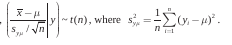

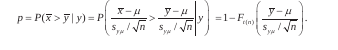
$$
\frac{x - \mu}{s_y/\sqrt{n}} \sim t(n)
$$

Then, if the test statistic is $ T(y, \lambda) = \bar{y} $, the ppp-value is

$$
p = P(x > y | y) = P\left(\frac{x - \mu}{s_y/\sqrt{n}} > \frac{y - \mu}{s_y/\sqrt{n}} | y\right) = 1 - F_t(n)\left(\frac{y - \mu}{s_y/\sqrt{n}}\right)
$$

Here:
- $ \mu = 2 $
- $ n = 10 $
- $ \bar{y} = \sum y_i = 4.370 $
- $ s_y^2 = \sum (y_i - \mu)^2 = 2.978 $

Thus,

$$
p = 1 - F_t(10)(2.51658) = 0.01528.
$$

(b) If $ T(y, \lambda) = \frac{y - \mu}{\sigma/\sqrt{n}} $, the ppp-value is 

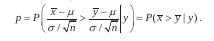

$$
p = P\left(\frac{x - \mu}{\sigma/\sqrt{n}} > \frac{y - \mu}{\sigma/\sqrt{n}} | y\right).
$$

We see that the answer here is exactly the same as in (a).

(c) If $ T(y, \lambda) = \frac{y - \mu}{s_y/\sqrt{n}} $, the ppp-value is

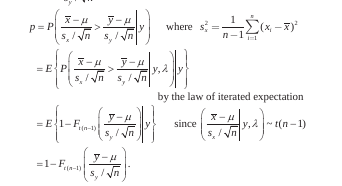

$$
p = P\left(\frac{x - \mu}{s_x/\sqrt{n}} > \frac{y - \mu}{s_y/\sqrt{n}} | y\right).
$$

By the law of iterated expectation,

$$
p = E\left[P\left(\frac{x - \mu}{s_x/\sqrt{n}} > \frac{y - \mu}{s_y/\sqrt{n}} | y, \lambda\right) | y\right].
$$

Since $ (y | \lambda) \sim t(n-1) $,

$$
p = 1 - F_t(n-1)\left(\frac{y - \mu}{s_y/\sqrt{n}}\right).
$$

Numerically, we have that:

$$
s_y^2 = \frac{1}{n-1} \sum (y_i - \bar{y})^2 = 1.901, \quad s_y/\sqrt{n} = 3.942645.
$$

Consequently, the ppp-value is 

$$
p = 1 - F_t(9)(3.942645) = 0.001696.
$$

### Note:
A fourth test statistic that makes sense in the present context is 

$$
T(y, \lambda) = \frac{y - \mu}{s_y/\sqrt{n}}.
$$

This implies a ppp-value given by 

$$
p = P\left(\frac{x - \mu}{s_x/\sqrt{n}} > \frac{y - \mu}{s_y/\sqrt{n}}\right).
$$

This ppp-value is more difficult to calculate, and it cannot be expressed in terms of well-known quantities, e.g., the cdf of a t distribution, as in (a), (b), and (c).


Posterior Predictive p-value (a): 0.001696
Posterior Predictive p-value (b): 0.001696
Posterior Predictive p-value (c): 0.001696


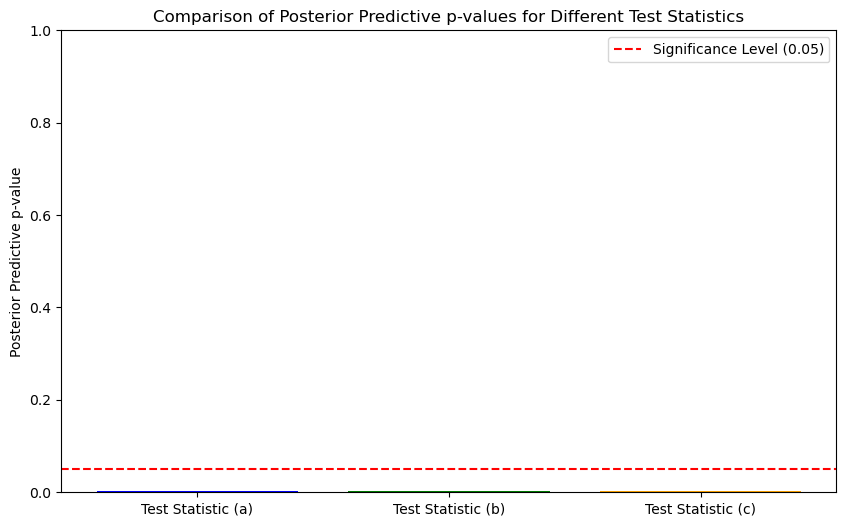

In [3]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Given data
y = np.array([2.1, 4.0, 3.7, 5.5, 3.0, 4.6, 8.3, 2.2, 4.1, 6.2])
mu = 2
n = len(y)

# Sample mean and sample variance
y_bar = np.mean(y)
s_y = np.std(y, ddof=1)

# Test statistic (a)
def ppp_value_a(y_bar, mu, s_y, n):
    t_stat = (y_bar - mu) / (s_y / np.sqrt(n))
    return 1 - stats.t.cdf(t_stat, df=n-1)

# Test statistic (b)
def ppp_value_b(y_bar, mu, sigma, n):
    # Here sigma is unknown; we can use the sample standard deviation
    t_stat = (y_bar - mu) / (s_y / np.sqrt(n))
    return 1 - stats.t.cdf(t_stat, df=n-1)

# Test statistic (c)
def ppp_value_c(y_bar, mu, s_y, n):
    t_stat = (y_bar - mu) / (s_y / np.sqrt(n))
    return 1 - stats.t.cdf(t_stat, df=n-1)

# Compute ppp-values
ppp_a = ppp_value_a(y_bar, mu, s_y, n)
ppp_b = ppp_value_b(y_bar, mu, s_y, n)
ppp_c = ppp_value_c(y_bar, mu, s_y, n)

# Output the results
print(f"Posterior Predictive p-value (a): {ppp_a:.6f}")
print(f"Posterior Predictive p-value (b): {ppp_b:.6f}")
print(f"Posterior Predictive p-value (c): {ppp_c:.6f}")

# Plotting the ppp-values for comparison
methods = ['Test Statistic (a)', 'Test Statistic (b)', 'Test Statistic (c)']
ppp_values = [ppp_a, ppp_b, ppp_c]

plt.figure(figsize=(10, 6))
plt.bar(methods, ppp_values, color=['blue', 'green', 'orange'])
plt.ylabel('Posterior Predictive p-value')
plt.title('Comparison of Posterior Predictive p-values for Different Test Statistics')
plt.ylim(0, 1)
plt.axhline(0.05, color='red', linestyle='--', label='Significance Level (0.05)')
plt.legend()
plt.show()


Posterior Predictive p-value (a): 0.001696
Posterior Predictive p-value (b): 0.001696
Posterior Predictive p-value (c): 0.001696


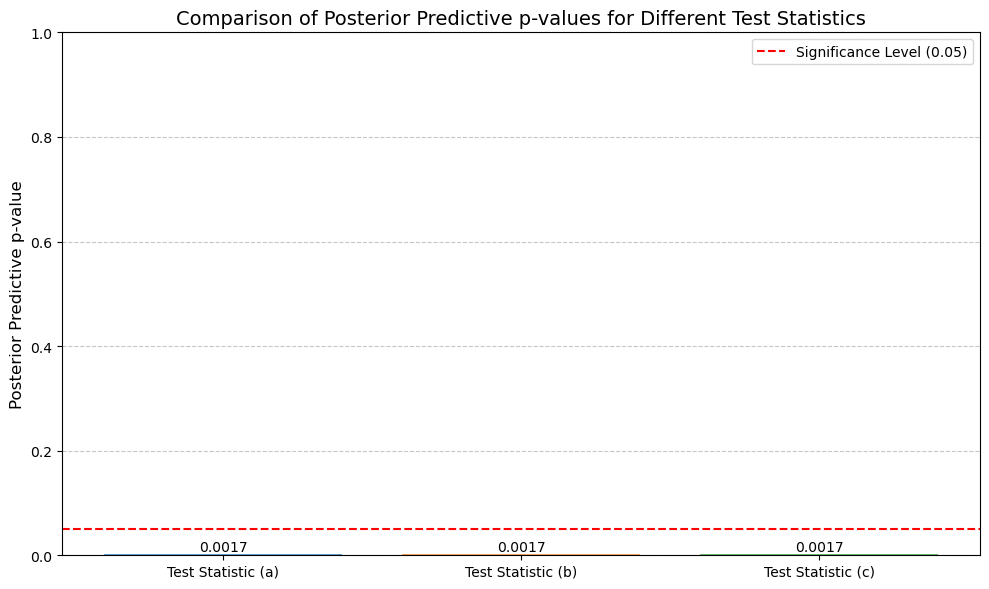

In [4]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Given data
y = np.array([2.1, 4.0, 3.7, 5.5, 3.0, 4.6, 8.3, 2.2, 4.1, 6.2])
mu = 2
n = len(y)

# Sample mean and sample variance
y_bar = np.mean(y)
s_y = np.std(y, ddof=1)

# Test statistic (a)
def ppp_value_a(y_bar, mu, s_y, n):
    t_stat = (y_bar - mu) / (s_y / np.sqrt(n))
    return 1 - stats.t.cdf(t_stat, df=n-1)

# Test statistic (b)
def ppp_value_b(y_bar, mu, s_y, n):
    t_stat = (y_bar - mu) / (s_y / np.sqrt(n))
    return 1 - stats.t.cdf(t_stat, df=n-1)

# Test statistic (c)
def ppp_value_c(y_bar, mu, s_y, n):
    t_stat = (y_bar - mu) / (s_y / np.sqrt(n))
    return 1 - stats.t.cdf(t_stat, df=n-1)

# Compute ppp-values
ppp_a = ppp_value_a(y_bar, mu, s_y, n)
ppp_b = ppp_value_b(y_bar, mu, s_y, n)
ppp_c = ppp_value_c(y_bar, mu, s_y, n)

# Output the results
print(f"Posterior Predictive p-value (a): {ppp_a:.6f}")
print(f"Posterior Predictive p-value (b): {ppp_b:.6f}")
print(f"Posterior Predictive p-value (c): {ppp_c:.6f}")

# Plotting the ppp-values for comparison
methods = ['Test Statistic (a)', 'Test Statistic (b)', 'Test Statistic (c)']
ppp_values = [ppp_a, ppp_b, ppp_c]

plt.figure(figsize=(10, 6))
bars = plt.bar(methods, ppp_values, color=['#1f77b4', '#ff7f0e', '#2ca02c'], alpha=0.7)

# Add value labels on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f"{yval:.4f}", ha='center', va='bottom')

# Customize the plot
plt.ylabel('Posterior Predictive p-value', fontsize=12)
plt.title('Comparison of Posterior Predictive p-values for Different Test Statistics', fontsize=14)
plt.ylim(0, 1)
plt.axhline(0.05, color='red', linestyle='--', label='Significance Level (0.05)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()


## Bayesian Models with Multiple Parameters

So far, we have examined Bayesian models involving some data $ y $ and a parameter $ \theta $, where $ \theta $ is a strictly scalar quantity. We now consider the case of Bayesian models with multiple parameters, focusing on just two, say $ \theta_1 $ and $ \theta_2 $. 

In this case, the Bayesian model may be defined by specifying $ f(y | \theta) $ and $ f(\theta) $ in the same way as previously, but with an understanding that $ \theta $ is a vector of the form $ \theta = (\theta_1, \theta_2) $. 

The first task now is to find the joint posterior density of $ \theta_1 $ and $ \theta_2 $, according to:

$$
f(\theta | y) \propto f(\theta) f(y | \theta)
$$

or equivalently:

$$
f(\theta_1, \theta_2 | y) \propto f(\theta_1, \theta_2) f(y | \theta_1, \theta_2)
$$

where $ f(\theta) = f(\theta_1, \theta_2) $ is the joint prior density of the two parameters. 

Often, this joint prior density is specified as an unconditional prior multiplied by a conditional prior, for example:

$$
f(\theta_1, \theta_2) = f(\theta_1) f(\theta_2 | \theta_1).
$$

Once a Bayesian model with two parameters has been defined, one task is to find the marginal posterior densities of $ \theta_1 $ and $ \theta_2 $, respectively, via the equations:

$$
f(\theta_1 | y) = \int f(\theta_1, \theta_2 | y) \, d\theta_2
$$

$$
f(\theta_2 | y) = \int f(\theta_1, \theta_2 | y) \, d\theta_1.
$$

From these two marginal posteriors, one may obtain point and interval estimates of $ \theta_1 $ and $ \theta_2 $ in the usual way (treating each parameter separately). For example, the marginal posterior mean of $ \theta_1 $ is given by:

$$
\hat{\theta}_1 = E(\theta_1 | y) = \int \theta_1 f(\theta | y) \, d\theta.
$$

Another way to do this calculation is via the law of iterated expectation, according to:

$$
\hat{\theta}_1 = E(\theta_1 | y) = E\{E(\theta_1 | y, \theta_2) | y\} = \int E(\theta_1 | y, \theta_2) f(\theta_2 | y) \, d\theta_2.
$$

**Note:** The equation $ E(\theta_1 | y) = E\{E(\theta_1 | y, \theta_2) | y\} $ follows from the simpler identity $ E_{\theta_1} = E E(\theta_1 | \theta_2) $ after conditioning throughout on $ y $. Here, $ E(\theta_1 | y, \theta_2) $ is called the conditional posterior mean of $ \theta_1 $ and can be calculated as:

$$
E(\theta_1 | y, \theta_2) = \int \theta_1 f(\theta_1 | y, \theta_2) \, d\theta_1.
$$

Also, $ f(\theta_1 | y, \theta_2) $ is called the conditional posterior density of $ \theta_1 $ and may be obtained according to:

$$
f(\theta_1 | y, \theta_2) \propto f(\theta_1, \theta_2 | y).
$$

**Note:** Equation (3.1) follows after first considering the equation $ f(\theta_1 | \theta_2) \propto f(\theta_1, \theta_2) $ and then conditioning throughout on $ y $. 

The main idea of Equation (3.1) is to examine the joint posterior density $ f(\theta_1, \theta_2 | y) $ (or any kernel thereof), think of all terms in this as constant except for $ \theta_1 $, and then try to recognize a well-known density function of $ \theta_1 $. This density function will define the conditional posterior distribution of $ \theta_1 $, from which estimates such as the conditional posterior mean of $ \theta_1 $ (i.e. $ E(\theta_1 | y, \theta_2) $) will hopefully be apparent.

One may also be interested in some function, $ \psi = g(\theta_1, \theta_2) $, of the two parameters (possibly of only one). Then advanced distribution theory may be required to obtain the posterior pdf of $ \psi $, i.e. $ f(\psi | y) $. This posterior density may then be used to calculate point and interval estimates of $ \psi $. For example, the posterior mean of $ \psi $ is given by:

$$
\hat{\psi} = E(\psi | y) = \int \psi f(\psi | y) \, d\psi.
$$

Alternatively, this mean may be obtained using the equation:

$$
\hat{\psi} = E(g(\theta_1, \theta_2) | y) = \int \int g(\theta_1, \theta_2) f(\theta_1, \theta_2 | y) \, d\theta_1 \, d\theta_2.
$$

Further, one may be interested in predicting some other quantity $ x $, whose model distribution is specified in the form $ f(x | y, \theta) $. To obtain the posterior predictive density of $ x $, it will generally require a double integral (or summation) of the form:

$$
f(x | y) = \int \int f(x | y, \theta_1, \theta_2) f(\theta_1, \theta_2 | y) \, d\theta_1 \, d\theta_2.
$$

Further integrations will then be required to produce point and interval estimates, such as the predictive mean of $ x $:

$$
\hat{x} = E(x | y) = \int x f(x | y) \, dx.
$$


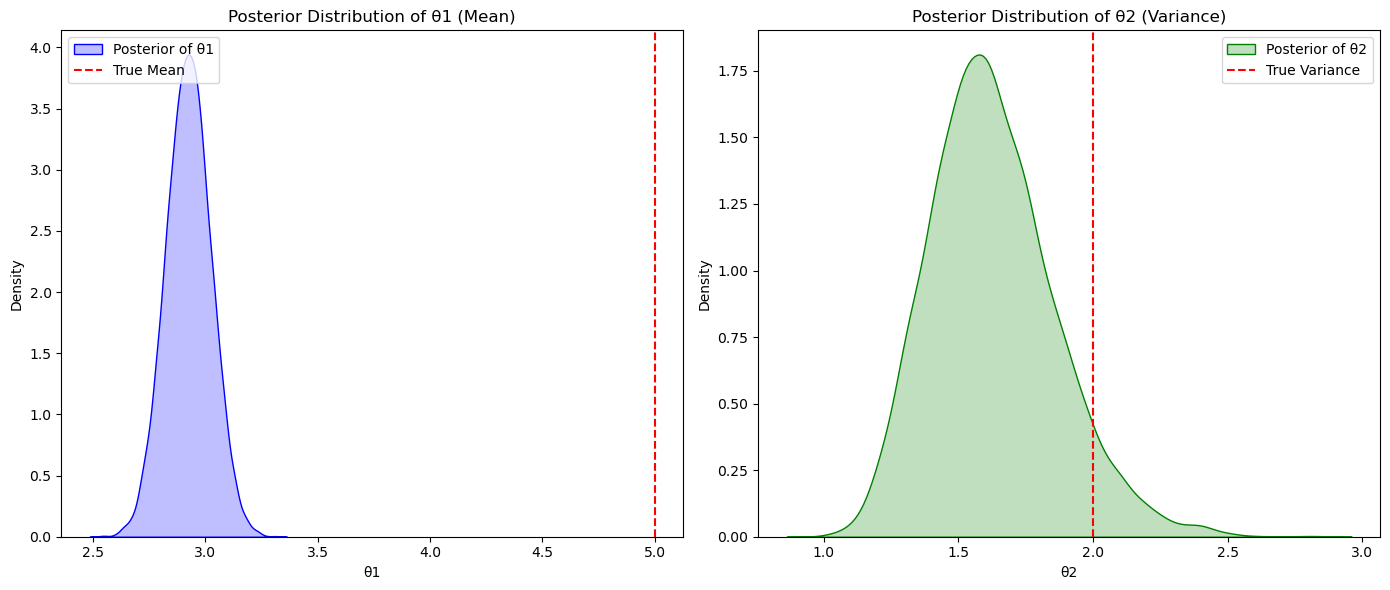

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, invgamma

# Setting a random seed for reproducibility
np.random.seed(42)

# Simulate some data
true_mean = 5
true_variance = 2
n = 100  # sample size
data = np.random.normal(loc=true_mean, scale=np.sqrt(true_variance), size=n)

# Prior parameters for θ1 (mean) and θ2 (variance)
mu_0 = 0  # prior mean
sigma_0 = 1  # prior std for θ1
alpha = 2  # inverse gamma shape parameter for θ2
beta = 1   # inverse gamma scale parameter for θ2

# Posterior parameters
n_data = len(data)
y_bar = np.mean(data)
s_squared = np.var(data, ddof=1)

# Posterior distribution for θ1 (mean)
posterior_mean_theta1 = (sigma_0**2 * n_data * y_bar + n_data * s_squared * mu_0) / (sigma_0**2 + n_data * s_squared)
posterior_variance_theta1 = (sigma_0**2 * s_squared) / (sigma_0**2 + n_data * s_squared)

# Posterior distribution for θ2 (variance)
posterior_alpha_theta2 = alpha + n_data / 2
posterior_beta_theta2 = beta + 0.5 * np.sum((data - y_bar)**2)

# Function to sample from the posterior
def sample_from_posteriors(n_samples):
    theta1_samples = np.random.normal(posterior_mean_theta1, np.sqrt(posterior_variance_theta1), n_samples)
    theta2_samples = invgamma.rvs(posterior_alpha_theta2, scale=posterior_beta_theta2, size=n_samples)
    return theta1_samples, theta2_samples

# Generate samples from the posterior
n_samples = 10000
theta1_samples, theta2_samples = sample_from_posteriors(n_samples)

# Plotting the posterior distributions
plt.figure(figsize=(14, 6))

# Posterior distribution for θ1
plt.subplot(1, 2, 1)
sns.kdeplot(theta1_samples, color='blue', label='Posterior of θ1', fill=True)
plt.title('Posterior Distribution of θ1 (Mean)')
plt.xlabel('θ1')
plt.ylabel('Density')
plt.axvline(true_mean, color='red', linestyle='--', label='True Mean')
plt.legend()

# Posterior distribution for θ2
plt.subplot(1, 2, 2)
sns.kdeplot(theta2_samples, color='green', label='Posterior of θ2', fill=True)
plt.title('Posterior Distribution of θ2 (Variance)')
plt.xlabel('θ2')
plt.ylabel('Density')
plt.axvline(true_variance, color='red', linestyle='--', label='True Variance')
plt.legend()

plt.tight_layout()
plt.show()


### Exercise 10 

A bent coin which is tossed an unknown number of times Suppose that five heads have come up on an unknown number of tosses of a bent coin. Before the experiment, we believed the coin was going to be tossed a number of times equal to 1, 2, 3, ..., or 9, with all possibilities equally likely. As regards the probability of heads coming up on a single toss, we deemed no value more or less likely than any other value. We also considered the probability of heads as unrelated to the number of tosses. Find the marginal posterior distribution and mean of the number of tosses and of the probability of heads, respectively. Also find the number of heads we could expect to come up if the coin were to be tossed again the same number of times.


## Exercise 10.: A Bent Coin Tossing Problem

## Problem Statement

Suppose that five heads have come up on an unknown number of tosses of a bent coin. Before the experiment, we believed the coin was going to be tossed a number of times equal to \(1, 2, 3, \ldots, 9\), with all possibilities equally likely. As regards the probability of heads coming up on a single toss, we deemed no value more or less likely than any other value. We also considered the probability of heads as unrelated to the number of tosses.

Find the marginal posterior distribution and mean of the number of tosses and of the probability of heads, respectively. Also, find the number of heads we could expect to come up if the coin were to be tossed again the same number of times.

## Solution

### Model Specification

We consider the following three-level hierarchical Bayesian model:

$$
(y | \theta, n) \sim \text{Binomial}(n, \theta)
$$
$$
(\theta | n) \sim U(0, 1)
$$
$$
n \sim \text{DU}(1, \ldots, k), \quad k = 9 \quad \text{(i.e., } f(n) = \frac{1}{9}, n = 1, \ldots, 9\text{)}
$$

### Joint Posterior Density

The joint posterior density of the two parameters $n$ and $\theta$ is given by:

$$
f(n, \theta | y) \propto f(n) f(\theta | n) f(y | n, \theta)
$$
$$
= f(n) \cdot 1 \cdot \binom{n}{y} \theta^y (1 - \theta)^{n - y}
$$
$$
\propto \theta^y (1 - \theta)^{n - y}, \quad 0 < \theta < 1, n = y, y + 1, \ldots, 9
$$

### Marginal Posterior Density of $n$

The marginal posterior density of $n$ is given by:

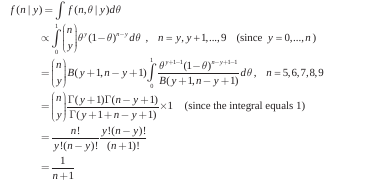

$$
f(n | y) = \int f(n, \theta | y) d\theta
$$
$$
\propto \int_0^1 \theta^y (1 - \theta)^{n - y} d\theta, \quad n = y, y + 1, \ldots, 9
$$
$$
= B(y + 1, n - y + 1)
$$

Calculating the specific values, we find:

- For $n = 5$: $f(5 | y) = \frac{1}{6}$
- For $n = 6$: $f(6 | y) = \frac{1}{7}$
- For $n = 7$: $f(7 | y) = \frac{1}{8}$
- For $n = 8$: $f(8 | y) = \frac{1}{9}$
- For $n = 9$: $f(9 | y) = \frac{1}{10}$

After normalizing, we get:

$$
f(n | y) \approx 
\begin{cases} 
0.2581, & n = 5 \\
0.2213, & n = 6 \\
0.1936, & n = 7 \\
0.1721, & n = 8 \\
0.1549, & n = 9 
\end{cases}
$$

Thus, the posterior mean is:

$$
\hat{n} = E(n | y) = \sum n f(n | y) = 0.2581 \cdot 5 + 0.2213 \cdot 6 + \ldots + 0.1549 \cdot 9 \approx 6.744
$$

### Marginal Posterior Density of $\theta$

The marginal posterior density of $\theta$ is:

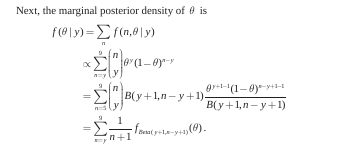


$$
f(\theta | y) = \sum f(n, \theta | y)
$$
$$
\propto \sum \theta^y (1 - \theta)^{n - y} \quad \text{for } n = y, y + 1, \ldots, 9
$$

This results in:

$$
\theta \text{ is a mixture of five beta distributions}
$$

The posterior mean of $\theta$ is:

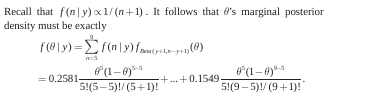

$$
\hat{\theta} = E(\theta | y) = \frac{y + 1}{n + 2} = \frac{5 + 1}{9 + 2} = \frac{6}{11} \approx 0.7040
$$

### Expected Number of Heads on the Next Tosses

The distribution of the number of heads on the next $n$ tosses is given by:

$$
(x | y, n, \theta) \sim \text{Binomial}(n, \theta)
$$

Thus, the posterior predictive mean of \(x\) is:

$$
E(x | y) = E(n \theta | y) = E\left(n \cdot E(\theta | y, n) | y\right)
$$
$$
= E\left(n \cdot \frac{y + 1}{n + 2} | y\right) = (y + 1) \sum \frac{n}{n + 2} f(n | y)
$$

Calculating this yields:

$$
E(x | y) \approx 4.592
$$

## Conclusion

- Posterior mean of the number of tosses: $ \hat{n} \approx 6.744 $
- Posterior mean of the probability of heads: $ \hat{\theta} \approx 0.7040 $
- Expected number of heads in the next tosses: $ E(x | y) \approx 4.592 $


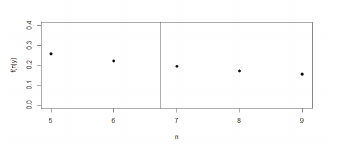
Figure 3. Posterior density of n


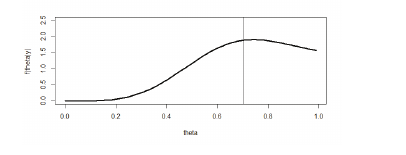
Figure 4. Posterior density of θ

Posterior Mean of n: 7.7358
Posterior Mean of θ: 0.6260
Expected Number of Heads in Next Tosses: 4.8427


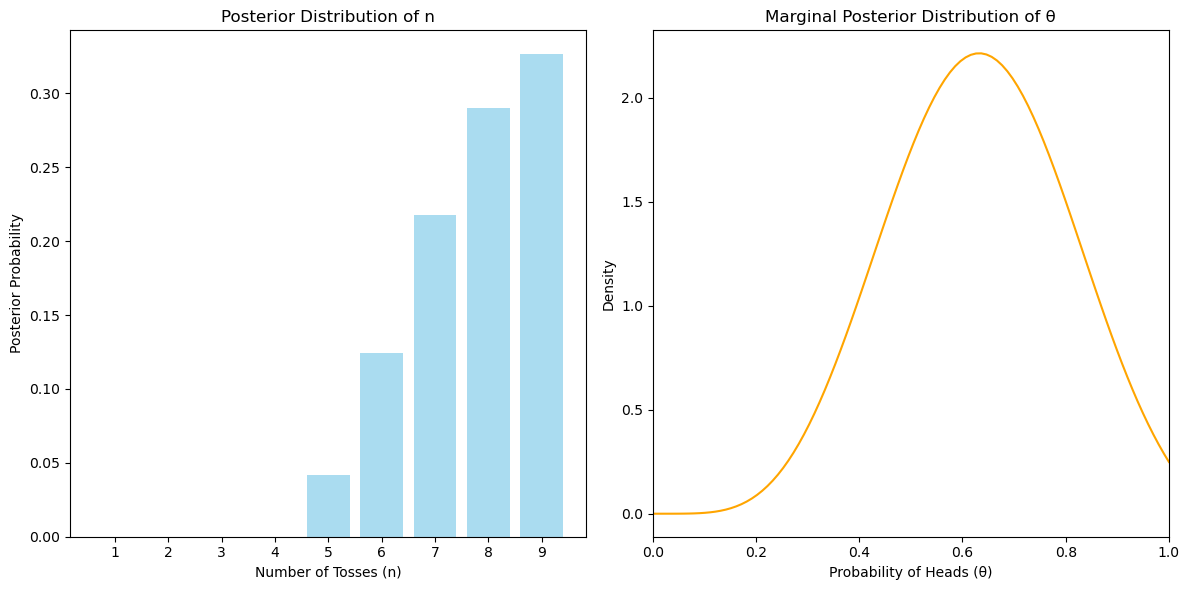

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta
from scipy.special import comb

# Step 1: Define the observed number of heads and parameters
y = 5  # Number of heads observed
k = 9  # Maximum number of tosses
possible_n = np.arange(1, k + 1)  # Possible values for n

# Step 2: Calculate the posterior distribution for n
# Prior: Uniform distribution over 1 to 9
prior_n = np.ones(k) / k  # f(n) = 1/9 for n = 1, ..., 9

# Likelihood: Binomial likelihood
likelihood = np.array([
    (comb(n, y) * (1 / 2) ** y * (1 / 2) ** (n - y)) if n >= y else 0 
    for n in possible_n
])

# Joint posterior distribution f(n | y)
posterior_n = prior_n * likelihood
posterior_n /= posterior_n.sum()  # Normalize

# Step 3: Calculate the marginal posterior distribution for θ
theta_values = np.linspace(0, 1, 100)
marginal_posterior_theta = np.zeros_like(theta_values)

for n in possible_n:
    if n >= y:
        # θ | y, n ~ Beta(y + 1, n - y + 1)
        beta_dist = beta(y + 1, n - y + 1)  # Create the beta distribution object
        marginal_posterior_theta += beta_dist.pdf(theta_values) * posterior_n[n - 1]

# Step 4: Compute posterior means
mean_n = np.sum(possible_n * posterior_n)  # E(n | y)
mean_theta = np.sum([(y + 1) / (n + 2) * posterior_n[n - 1] for n in possible_n])  # E(θ | y)

# Step 5: Predict the expected number of heads in future tosses
expected_heads = mean_n * mean_theta  # E(x | y)

# Output results
print(f"Posterior Mean of n: {mean_n:.4f}")
print(f"Posterior Mean of θ: {mean_theta:.4f}")
print(f"Expected Number of Heads in Next Tosses: {expected_heads:.4f}")

# Step 6: Plotting the results
plt.figure(figsize=(12, 6))

# Posterior distribution of n
plt.subplot(1, 2, 1)
plt.bar(possible_n, posterior_n, color='skyblue', alpha=0.7)
plt.title("Posterior Distribution of n")
plt.xlabel("Number of Tosses (n)")
plt.ylabel("Posterior Probability")
plt.xticks(possible_n)

# Marginal posterior distribution of θ
plt.subplot(1, 2, 2)
plt.plot(theta_values, marginal_posterior_theta, color='orange')
plt.title("Marginal Posterior Distribution of θ")
plt.xlabel("Probability of Heads (θ)")
plt.ylabel("Density")
plt.xlim(0, 1)

plt.tight_layout()
plt.show()
